First Linear Regression

In [1]:
import numpy as np

X, Y = np.loadtxt("temp.txt", skiprows=1, unpack=True)



In [2]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

In [3]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 58., 15., 15.,
       45., 47., 13., 63., 16., 21., 37., 30., 26., 56., 23., 39., 27.,
       45., 17., 18., 23.])

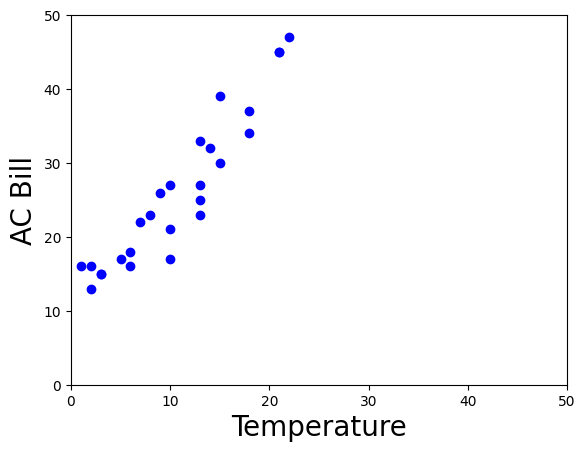

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.xlabel("Temperature", fontsize=20)  
plt.ylabel("AC Bill", fontsize=20)        
plt.axis([0, 50, 0, 50])                 
plt.plot(X, Y, "bo")                    
plt.show()    

Prediction FUnction (Straight Line)

In [5]:
def predict(X, w, b):
    return X * w + b

Test Prediction where first argument is temperature. w and b are weight and bias for the regression line

In [6]:
predict(14, 1.2, 12)

28.8

In [7]:
temperatures = np.array([14, 5, 7])
predict(temperatures, 1.2, 12)

array([28.8, 18. , 20.4])

Find Line with LOWEST ERROR (MEAN SQUARE ERROR) / LOSS (APPROXIMATION ERROR)

In [8]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    
    return np.average((predictions - Y) ** 2)

Takes our model (line --> w and b) and some samples (X, Y) and calculates the error of the model. 
Lower loss --> better model

In [9]:
loss(X, Y, 1.2, 12)

44.07866666666667

Training algorithm

In [10]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b

    raise Exception("Couldn't find a result within %d iterations" % iterations)

Train model --> set learning rate very low

In [11]:
w, b = train(X, Y, 100000, 0.001)

Iteration    0 => Loss: 1113.966667
Iteration    1 => Loss: 1112.993419
Iteration    2 => Loss: 1112.020609
Iteration    3 => Loss: 1111.048236
Iteration    4 => Loss: 1110.076301
Iteration    5 => Loss: 1109.104803
Iteration    6 => Loss: 1108.133743
Iteration    7 => Loss: 1107.163121
Iteration    8 => Loss: 1106.192937
Iteration    9 => Loss: 1105.223189
Iteration   10 => Loss: 1104.253880
Iteration   11 => Loss: 1103.285008
Iteration   12 => Loss: 1102.316574
Iteration   13 => Loss: 1101.348577
Iteration   14 => Loss: 1100.381018
Iteration   15 => Loss: 1099.413897
Iteration   16 => Loss: 1098.447213
Iteration   17 => Loss: 1097.480967
Iteration   18 => Loss: 1096.515158
Iteration   19 => Loss: 1095.549787
Iteration   20 => Loss: 1094.584853
Iteration   21 => Loss: 1093.620357
Iteration   22 => Loss: 1092.656299
Iteration   23 => Loss: 1091.692679
Iteration   24 => Loss: 1090.729495
Iteration   25 => Loss: 1089.766750
Iteration   26 => Loss: 1088.804442
Iteration   27 => Loss: 1087

In [12]:
w

1.779999999999915

In [13]:
b

7.687000000000902

Plot

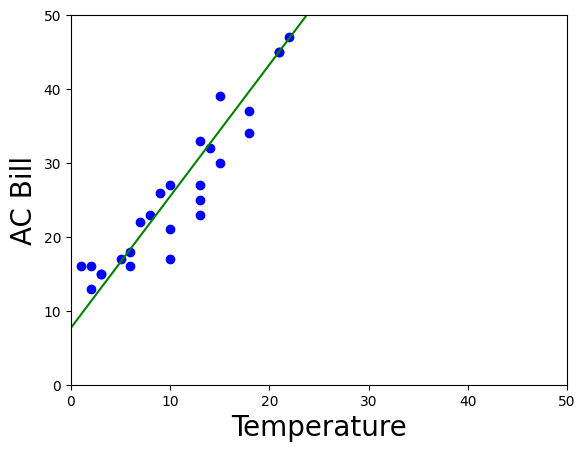

In [14]:
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("AC Bill", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")


plt.plot([0, 50], [b, predict(50, w, b)], color="g")


plt.show()

In [15]:
temperature = 20
print(f"{predict(temperature, w, b):.2f}")

43.29


MSE Loss Function

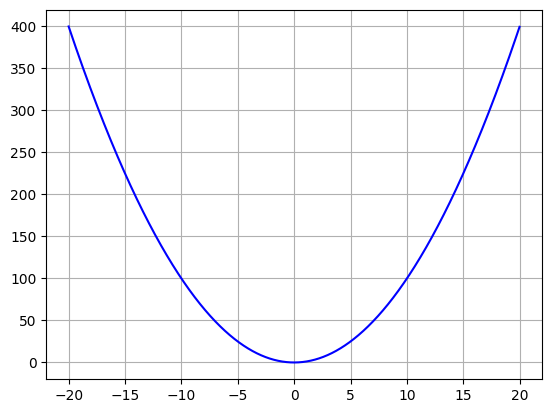

array([-20.  , -19.99, -19.98, ...,  19.97,  19.98,  19.99])

In [16]:

# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
    
# Plotting

x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

plt.plot(x_vals, y_vals, "blue")
plt.grid(True, which="major")
plt.show()
x_vals

MAE Loss Function

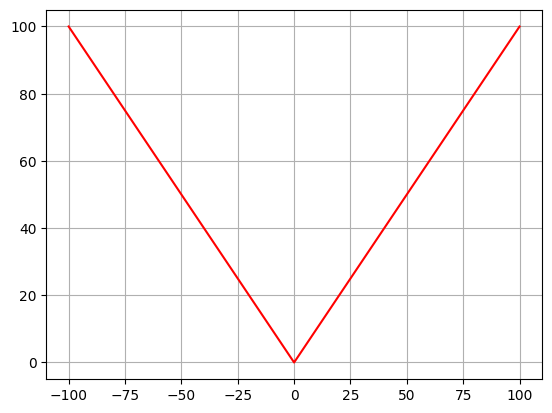

In [17]:
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")
plt.show()

Huber Loss Function

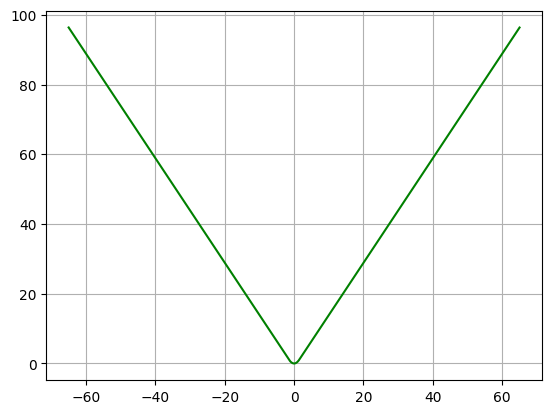

In [18]:
# Huber loss function
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)
    
# Plotting
x_vals = np.arange(-65, 65, 0.01)

delta = 1.5
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * delta)
y_vals = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

plt.plot(x_vals, y_vals, "green")
plt.grid(True, which="major")
plt.show()

In [19]:
huber_mse


array([2112.5    , 2111.85005, 2111.2002 , ..., 2110.55045, 2111.2002 ,
       2111.85005])

In [20]:
huber_mae

array([96.375, 96.36 , 96.345, ..., 96.33 , 96.345, 96.36 ])

In [21]:
x_vals, y_vals

(array([-65.  , -64.99, -64.98, ...,  64.97,  64.98,  64.99]),
 array([96.375, 96.36 , 96.345, ..., 96.33 , 96.345, 96.36 ]))

Log Loss

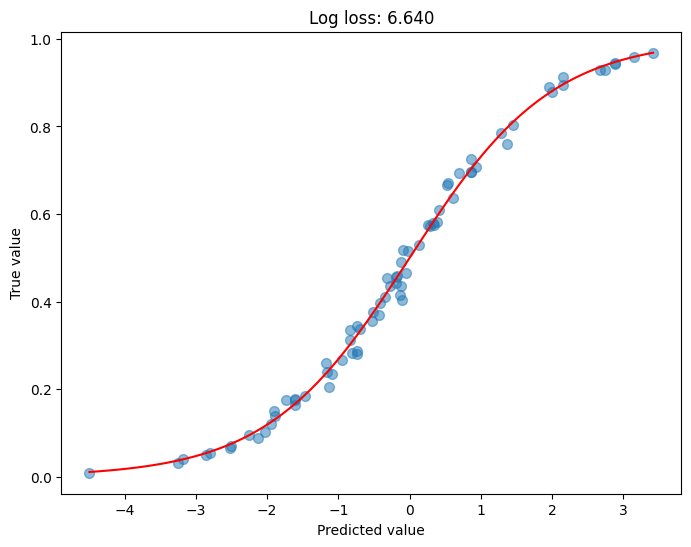

In [22]:
#np.random.seed(42)

N = 75
x = np.random.randn(N, 2)
w = np.array([1.5, -0.46])
y = 1 / (1 + np.exp(-x.dot(w) + np.random.randn(N) * 0.1))

# Define log loss function
def log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


y_pred = x.dot(w)
ll = log_loss(y, y_pred)

# Plot the data and the sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y, s=50, alpha=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title(f'Log loss: {ll:.3f}')

x_plot = np.linspace(y_pred.min(), y_pred.max(), 100)
y_plot = 1 / (1 + np.exp(-x_plot))  # use the logistic function
plt.plot(x_plot, y_plot, color='r')

plt.show()

In [23]:
x_plot

array([-4.495494  , -4.41556475, -4.3356355 , -4.25570625, -4.175777  ,
       -4.09584775, -4.0159185 , -3.93598925, -3.85606   , -3.77613075,
       -3.69620149, -3.61627224, -3.53634299, -3.45641374, -3.37648449,
       -3.29655524, -3.21662599, -3.13669674, -3.05676749, -2.97683824,
       -2.89690899, -2.81697974, -2.73705049, -2.65712124, -2.57719198,
       -2.49726273, -2.41733348, -2.33740423, -2.25747498, -2.17754573,
       -2.09761648, -2.01768723, -1.93775798, -1.85782873, -1.77789948,
       -1.69797023, -1.61804098, -1.53811173, -1.45818247, -1.37825322,
       -1.29832397, -1.21839472, -1.13846547, -1.05853622, -0.97860697,
       -0.89867772, -0.81874847, -0.73881922, -0.65888997, -0.57896072,
       -0.49903147, -0.41910222, -0.33917296, -0.25924371, -0.17931446,
       -0.09938521, -0.01945596,  0.06047329,  0.14040254,  0.22033179,
        0.30026104,  0.38019029,  0.46011954,  0.54004879,  0.61997804,
        0.69990729,  0.77983655,  0.8597658 ,  0.93969505,  1.01

In [24]:
y_plot

array([0.01103601, 0.01194336, 0.01292433, 0.01398472, 0.01513079,
       0.01636922, 0.01770719, 0.0191524 , 0.02071307, 0.022398  ,
       0.02421662, 0.02617894, 0.02829566, 0.03057816, 0.03303852,
       0.03568955, 0.03854483, 0.04161868, 0.0449262 , 0.04848328,
       0.05230657, 0.05641349, 0.06082217, 0.06555145, 0.07062081,
       0.0760503 , 0.08186045, 0.08807217, 0.09470664, 0.10178509,
       0.1093287 , 0.11735835, 0.12589437, 0.13495633, 0.1445627 ,
       0.15473055, 0.16547522, 0.17680994, 0.18874547, 0.20128969,
       0.21444722, 0.22821907, 0.24260221, 0.25758928, 0.27316828,
       0.2893223 , 0.30602939, 0.3232624 , 0.34098901, 0.35917177,
       0.3777683 , 0.3967316 , 0.41601039, 0.43554963, 0.45529112,
       0.47517413, 0.49513616, 0.51511372, 0.53504309, 0.55486119,
       0.57450633, 0.593919  , 0.61304253, 0.63182377, 0.65021355,
       0.66816722, 0.68564488, 0.70261172, 0.71903805, 0.73489941,
       0.75017644, 0.7648548 , 0.77892488, 0.7923816 , 0.80522